# LOADING IN LIBRARIES AND DATASET


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read CSV 
rawDf = pd.read_csv("CannabisCanada.csv")
rawDf.describe()


,Year,Unlicensed Cannabis Sales,Tax Rate,Licensed Cannabis Sales,Unemployment Rates,"Police Rate (per 100,000 people)",GDP Per Capita (2017 Constant Prices),recreational dummy,Age(%15-24),"Property Crime Rate (per 100,000 people)","Violent Crime Rate (per 100,000 people)",Retail Sales (2017 Chained Dollars),Retail Licensing Fees
count,234.000000,234.000000,195.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,1.950000e+02,195.000000
mean,2015.500000,325.097863,6.398564,129.559402,8.056410,215.935331,62285.374969,0.388889,13.068856,7192.518675,2995.980299,3.993404e+07,524.615385
std,5.199249,484.565689,11.064188,396.800787,3.032397,99.699725,16866.124478,0.488543,1.883131,6727.658254,3111.435370,5.585429e+07,1796.107398
min,2007.000000,3.900000,0.000000,0.000000,3.500000,0.000000,41740.191270,0.000000,10.337991,1558.820000,749.240000,2.781050e+05,0.000000
25%,2011.000000,13.600000,0.000000,0.000000,5.700000,172.160099,47725.136907,0.000000,11.943415,3228.367500,1259.805000,1.817996e+06,0.000000
50%,2015.500000,105.600000,0.000000,0.000000,7.500000,190.111393,58542.611425,0.000000,12.804130,4424.005000,1553.525000,1.401694e+07,0.000000
75%,2020.000000,529.550000,14.500000,27.875000,9.600000,208.793945,71008.188187,1.000000,13.688380,6845.292500,2546.347500,6.344456e+07,0.000000
max,2024.000000,2051.500000,34.300000,2951.900000,16.700000,466.598910,128030.233200,1.000000,19.663232,30399.950000,13341.520000,2.446874e+08,10000.000000


# DATA CLEANING


**Converting to nice naming conventions(snake case)**

In [2]:
cleanedDF = rawDf.copy()

In [3]:
cleanedDF.columns

Index(['Province', 'Year', 'Unlicensed Cannabis Sales', 'Tax Rate',
       'Licensed Cannabis Sales', 'Unemployment Rates',
       'Police Rate (per 100,000 people)', 'Police officers Total',
       'GDP(MILLIONS)', 'TOTAL GDP', 'GDP Per Capita (2017 Constant Prices)',
       'Population', 'recreational dummy', 'age 15-19', 'age 19-24',
       'TotalAge(15-24)', 'Age(%15-24)',
       'Property Crime Rate (per 100,000 people)',
       'Violent Crime Rate (per 100,000 people)',
       'Retail Sales (2017 Chained Dollars)', 'Retail Licensing Fees'],
      dtype='object')

In [4]:
cleanedDF.columns = [
    'province',
    'year',
    'unlicensed_cannabis_sales',
    'cannabis_tax_rate',
    'licensed_cannabis_sales',
    'unemployment_rates',
    'police_rate_per_100000_people',
    'police_officers_total',
    'gdp_millions',
    'total_gdp',
    'gdp_per_capita_2017_chained_dollars',
    'population',
    'recreational_cannabis_dummy',
    'age_15_19',
    'age_19_24',
    'total_age_15_24',
    'age_percent_15_24',
    'property_crime_rate_per_100000_people',
    'violent_crime_rate_per_100000_people',
    'retail_cannabis_sales_2017_chained_dollars',
    'retail_cannabis_licensing_fees'
]


In [5]:
# check for nas
cleanedDF.isna().sum()

province                                       0
year                                           0
unlicensed_cannabis_sales                      0
cannabis_tax_rate                             39
licensed_cannabis_sales                        0
unemployment_rates                             0
police_rate_per_100000_people                  0
police_officers_total                         26
gdp_millions                                   0
total_gdp                                      0
gdp_per_capita_2017_chained_dollars            0
population                                     0
recreational_cannabis_dummy                    0
age_15_19                                      0
age_19_24                                      0
total_age_15_24                                0
age_percent_15_24                              0
property_crime_rate_per_100000_people          0
violent_crime_rate_per_100000_people           0
retail_cannabis_sales_2017_chained_dollars    39
retail_cannabis_lice

**Ensure correct data types**

In [6]:
cleanedDF["gdp_millions"] = cleanedDF["gdp_millions"].str.replace(",", "").astype(float)
cleanedDF["total_gdp"] = cleanedDF["total_gdp"].str.replace(",", "").astype(float)
cleanedDF["population"] = cleanedDF["population"].str.replace(",", "").astype(float)
cleanedDF["age_15_19"] = cleanedDF["age_15_19"].str.replace(",", "").astype(float)
cleanedDF["age_19_24"] = cleanedDF["age_19_24"].str.replace(",", "").astype(float)
cleanedDF["total_age_15_24"] = cleanedDF["total_age_15_24"].str.replace(",", "").astype(float)
cleanedDF["police_officers_total"]= cleanedDF["police_officers_total"].str.replace(",", "").astype(float) 



In [7]:
# I want to add a column for cannabis sales per capita and total sales 

cleanedDF['total_cannabis_sales'] = cleanedDF['licensed_cannabis_sales'] + cleanedDF['unlicensed_cannabis_sales']
cleanedDF['cannabis_sales_per_capita'] = (cleanedDF['total_cannabis_sales'] * 100000) / cleanedDF['population']
cleanedDF[['province', 'year', 'cannabis_sales_per_capita']]

,province,year,cannabis_sales_per_capita
0,Newfoundland-and-Labrador,2007,12.179622
1,Newfoundland-and-Labrador,2008,12.158673
2,Newfoundland-and-Labrador,2009,12.249851
3,Newfoundland-and-Labrador,2010,12.394589
4,Newfoundland-and-Labrador,2011,12.705851
...,...,...,...
229,Nunavut,2020,15.957851
230,Nunavut,2021,16.714065
231,Nunavut,2022,21.180701
232,Nunavut,2023,30.550396


**Dealing with empty values** 

**It is important to have a balanced panel so I will not be dropping any rows. This panel is by province-year**

In [8]:
# impute tax rate from 2022-24 with the province's tax rate from 2021

taxratebyprovince = cleanedDF.loc[cleanedDF["year"] == 2021, ["province", "cannabis_tax_rate"]]
mask_22_24 = cleanedDF["year"].isin([2022, 2023, 2024])

cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Newfoundland-and-Labrador"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Newfoundland-and-Labrador", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Prince Edward Island"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Prince Edward Island", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Nova Scotia"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Nova Scotia", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "New Brunswick"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "New Brunswick", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Quebec"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Quebec", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Ontario"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Ontario", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Manitoba"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Manitoba", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Saskatchewan"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Saskatchewan", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Alberta"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Alberta", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "British Columbia"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "British Columbia", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Yukon"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Yukon", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Northwest Territories"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Northwest Territories", "cannabis_tax_rate"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Nunavut"), "cannabis_tax_rate"] = taxratebyprovince.loc[taxratebyprovince["province"] == "Nunavut", "cannabis_tax_rate"].values[0]


In [9]:
#now do the same for retail cannabis licensing fees
licensingfeesbyprovince = cleanedDF.loc[cleanedDF["year"] == 2021, ["province", "retail_cannabis_licensing_fees"]]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Newfoundland-and-Labrador"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Newfoundland-and-Labrador", "retail_cannabis_licensing_fees"].values[0]  
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Prince Edward Island"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Prince Edward Island", "retail_cannabis_licensing_fees"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Nova Scotia"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Nova Scotia", "retail_cannabis_licensing_fees"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "New Brunswick"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "New Brunswick", "retail_cannabis_licensing_fees"].values[0]      
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Quebec"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Quebec", "retail_cannabis_licensing_fees"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Ontario"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Ontario", "retail_cannabis_licensing_fees"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Manitoba"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Manitoba", "retail_cannabis_licensing_fees"].values[0]        
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Saskatchewan"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Saskatchewan", "retail_cannabis_licensing_fees"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] ==  "Alberta"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Alberta", "retail_cannabis_licensing_fees"].values[0] 
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "British Columbia"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "British Columbia", "retail_cannabis_licensing_fees"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Yukon"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Yukon", "retail_cannabis_licensing_fees"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Northwest Territories"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Northwest Territories", "retail_cannabis_licensing_fees"].values[0]
cleanedDF.loc[mask_22_24 & (cleanedDF["province"] == "Nunavut"), "retail_cannabis_licensing_fees"] = licensingfeesbyprovince.loc[licensingfeesbyprovince["province"] == "Nunavut", "retail_cannabis_licensing_fees"].values[0]      


In [10]:
# imput missing police rates with the average police rate for the specific province

# if = 0 set to nan 
cleanedDF['police_rate_per_100000_people'] = cleanedDF['police_rate_per_100000_people'].replace(0, np.nan)

#from sklearn.impute import SimpleImputer
#imputerMean = SimpleImputer(missing_values=np.nan,strategy='mean')
#cleanedDF['police_rate_per_100000_people'] = imputerMean.fit_transform(cleanedDF[['police_rate_per_100000_people']])
#cleanedDF.isna().sum()

# while this works it is imputing the average of all police rates which could really mess up my analysis. I want it to impute the average police rate for the specific province. I will need to group by province and then hard impute the average police rate for each province.



In [11]:
#imputing averages by province to get rid of nas 

province_means = cleanedDF.groupby('province')['police_rate_per_100000_people'].transform('mean')
cleanedDF['police_rate_per_100000_people'] = cleanedDF['police_rate_per_100000_people'].fillna(province_means)


cleanedDF['police_officers_total'] = (
    cleanedDF['police_officers_total'].fillna(cleanedDF.groupby('province')['police_officers_total'].transform('mean')))

cleanedDF['retail_cannabis_sales_2017_chained_dollars'] = (
    cleanedDF['retail_cannabis_sales_2017_chained_dollars']
    .fillna(cleanedDF.groupby('province')['retail_cannabis_sales_2017_chained_dollars'].transform('mean')))



In [12]:
cleanedDF.isna().sum()
# this was worth celebrating lol 


province                                      0
year                                          0
unlicensed_cannabis_sales                     0
cannabis_tax_rate                             0
licensed_cannabis_sales                       0
unemployment_rates                            0
police_rate_per_100000_people                 0
police_officers_total                         0
gdp_millions                                  0
total_gdp                                     0
gdp_per_capita_2017_chained_dollars           0
population                                    0
recreational_cannabis_dummy                   0
age_15_19                                     0
age_19_24                                     0
total_age_15_24                               0
age_percent_15_24                             0
property_crime_rate_per_100000_people         0
violent_crime_rate_per_100000_people          0
retail_cannabis_sales_2017_chained_dollars    0
retail_cannabis_licensing_fees          

# Data Visualizations

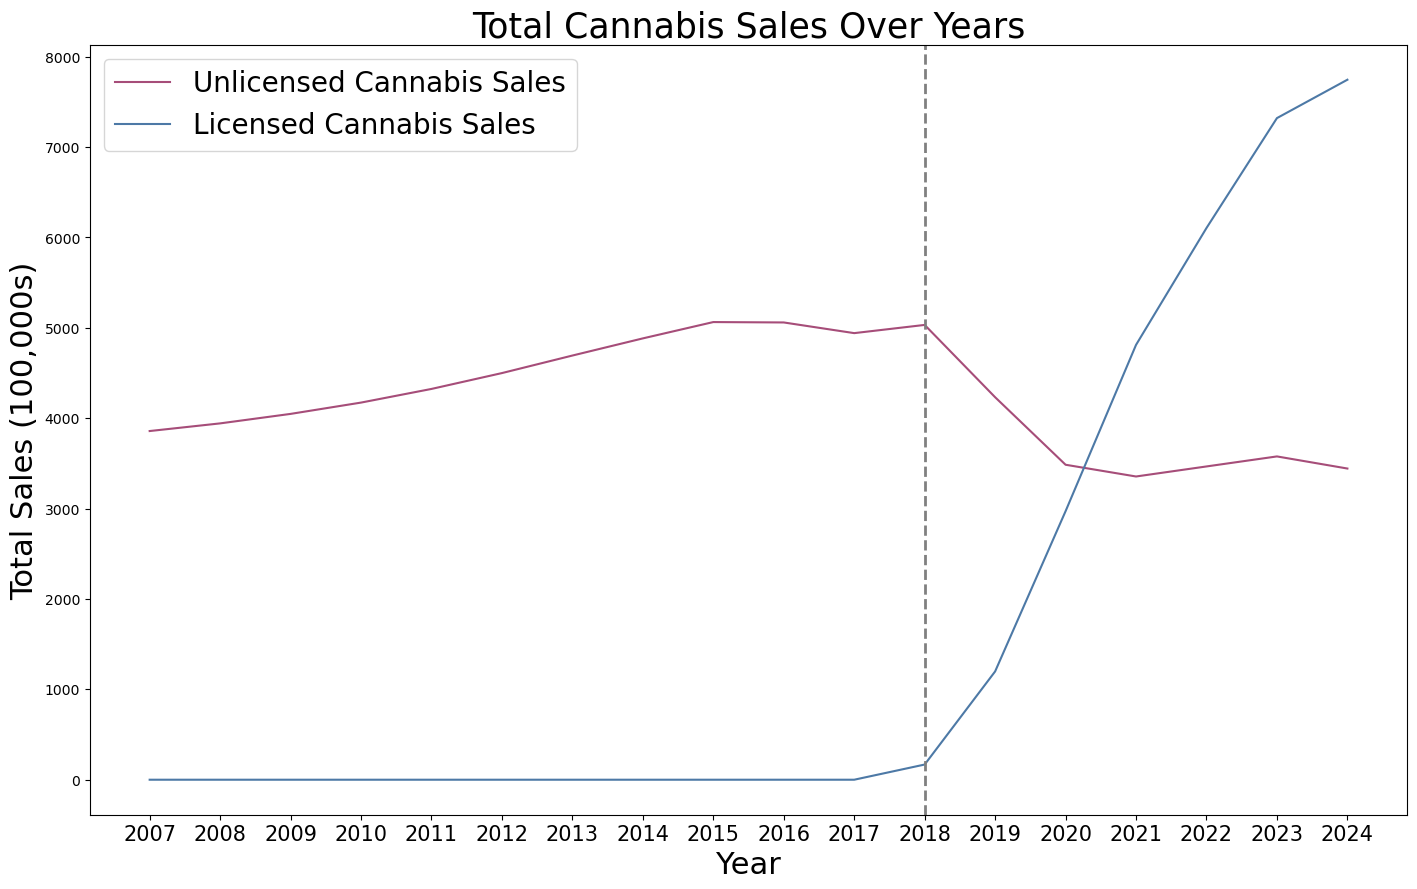

In [19]:
total_sales_by_year = cleanedDF.groupby('year')[['unlicensed_cannabis_sales', 'licensed_cannabis_sales']].sum()

plt.figure(figsize=(17, 10))
plt.plot(total_sales_by_year['unlicensed_cannabis_sales'], label='Unlicensed Cannabis Sales', color='#a64d79')
plt.plot(total_sales_by_year['licensed_cannabis_sales'], label='Licensed Cannabis Sales', color='#4d79a6')

plt.axvline(2018, color='grey', linestyle='--', linewidth=2)
plt.xlabel('Year', size=22)
plt.xticks(cleanedDF['year'].unique(), size=15)
plt.ylabel('Total Sales (100,000s)', size=22)
plt.title('Total Cannabis Sales Over Years', size=25)
plt.legend(fontsize=20)
plt.show()

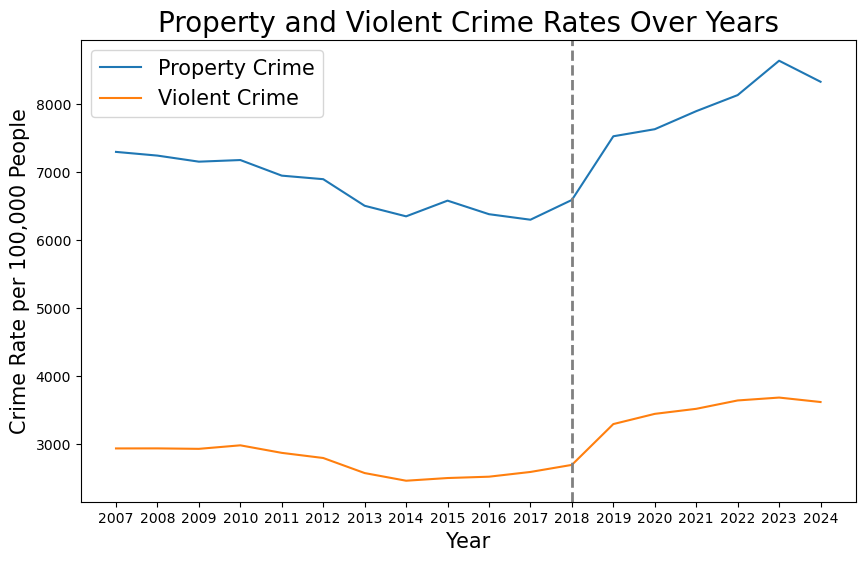

In [14]:
crimebyyear = cleanedDF.groupby('year')[['property_crime_rate_per_100000_people', 'violent_crime_rate_per_100000_people']].mean()

plt.figure(figsize=(10, 6))
plt.plot(crimebyyear['property_crime_rate_per_100000_people'], label="Property Crime")
plt.plot(crimebyyear['violent_crime_rate_per_100000_people'], label="Violent Crime")
plt.legend(fontsize=15)
plt.xlabel('Year', size=15)
plt.ylabel('Crime Rate per 100,000 People', size=15)
plt.title('Property and Violent Crime Rates Over Years', size=20)
plt.axvline(x=2018, color='grey', linestyle='--', linewidth=2)
plt.xticks(cleanedDF['year'].unique())
plt.show()


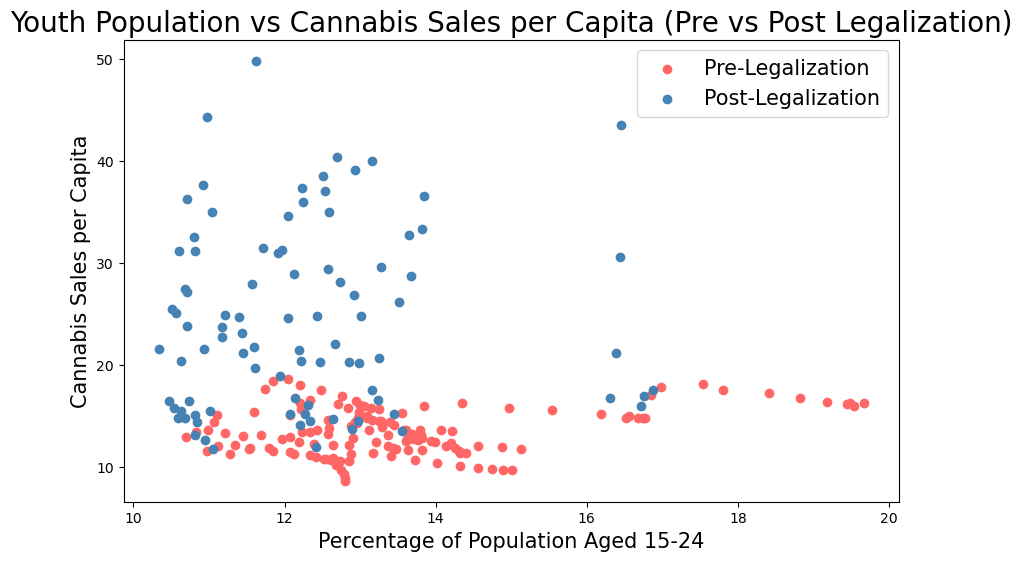

In [15]:
# scatter of youth population and cannabis sales per capita by pre and post legalization
pre_legalization = cleanedDF[cleanedDF['recreational_cannabis_dummy'] == 0]
post_legalization = cleanedDF[cleanedDF['recreational_cannabis_dummy'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(pre_legalization['age_percent_15_24'], pre_legalization['cannabis_sales_per_capita'], label='Pre-Legalization', color='#ff6666')
plt.scatter(post_legalization['age_percent_15_24'], post_legalization['cannabis_sales_per_capita'], label='Post-Legalization', color='#4682b4')
plt.xlabel('Percentage of Population Aged 15-24', size=15)
plt.ylabel('Cannabis Sales per Capita', size=15)
plt.title('Youth Population vs Cannabis Sales per Capita (Pre vs Post Legalization)', size=20)
plt.legend(fontsize=15)
plt.show()

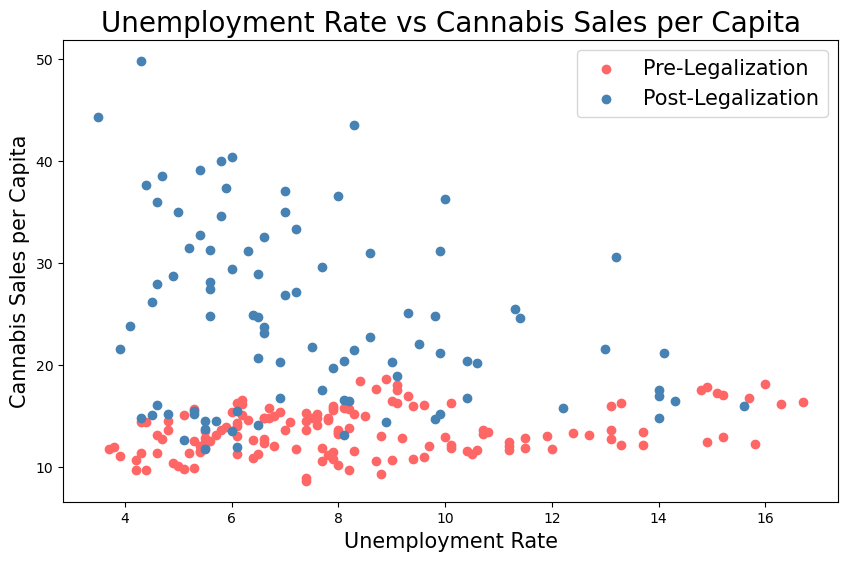

In [16]:
# unemployment vs cannabis sales per capita with pre and post legalization legend

plt.figure(figsize=(10, 6))
plt.scatter(pre_legalization['unemployment_rates'], pre_legalization['cannabis_sales_per_capita'], label='Pre-Legalization', color='#ff6666')
plt.scatter(post_legalization['unemployment_rates'], post_legalization['cannabis_sales_per_capita'], label='Post-Legalization', color='#4682b4')
plt.xlabel('Unemployment Rate', size=15)
plt.ylabel('Cannabis Sales per Capita', size=15)
plt.title('Unemployment Rate vs Cannabis Sales per Capita', size=20)
plt.legend(fontsize=15)
plt.show()

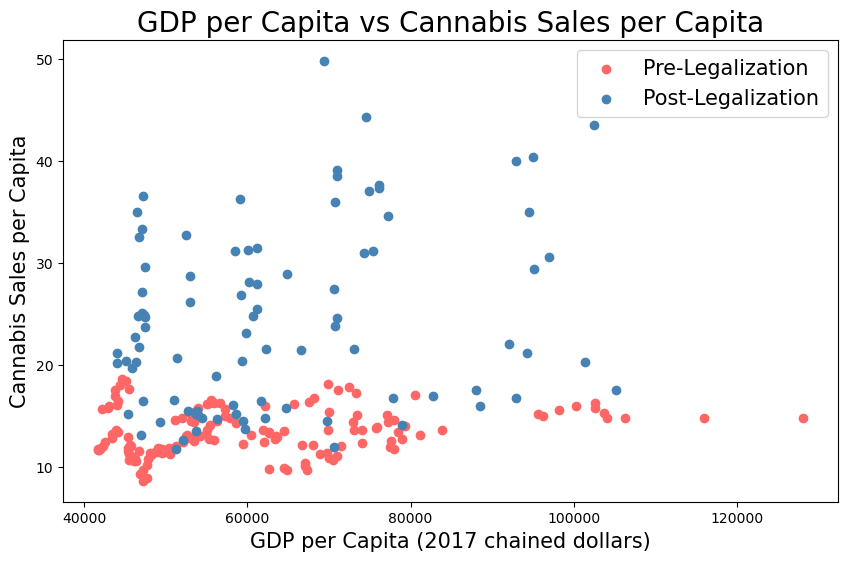

In [17]:
# gdp per capita vs cannabis sales per capita with pre and post legalization legend
plt.figure(figsize=(10, 6))
plt.scatter(pre_legalization['gdp_per_capita_2017_chained_dollars'], pre_legalization['cannabis_sales_per_capita'], label='Pre-Legalization', color='#ff6666')
plt.scatter(post_legalization['gdp_per_capita_2017_chained_dollars'], post_legalization['cannabis_sales_per_capita'], label='Post-Legalization', color='#4682b4')
plt.xlabel('GDP per Capita (2017 chained dollars)', size=15)
plt.ylabel('Cannabis Sales per Capita', size=15)
plt.title('GDP per Capita vs Cannabis Sales per Capita', size=20)
plt.legend(fontsize=15)
plt.show()